In [1]:
import pandas as  pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [40]:
population_clean= pd.read_csv(r'population_clean.csv')
population_clean=population_clean[population_clean['Year']>=2000]
population_clean.rename(columns = {'Year':'ds', 'Total forced displacements':'y'}, inplace = True)
population_clean['ds'] = pd.to_datetime(population_clean['ds'], format = '%Y')

In [42]:
population_clean

,ds,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,...,Others of concern,y,Continent_of_Asylum,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
0,2023-01-01,Philippines,PHL,Poland,POL,5,0,0,0,0,...,0,5,Europe,Eastern Europe,Asia,South-Eastern Asia,20.0,52.0,122.0,13.0
1,2023-01-01,South Africa,ZAF,Poland,POL,6,0,0,0,0,...,0,6,Europe,Eastern Europe,Africa,Southern Africa,20.0,52.0,24.0,-29.0
2,2023-01-01,Russian Federation,RUS,Poland,POL,2284,1102,0,0,0,...,0,3386,Europe,Eastern Europe,Europe,Eastern Europe,20.0,52.0,100.0,60.0
3,2023-01-01,Rwanda,RWA,Poland,POL,5,0,0,0,0,...,0,5,Europe,Eastern Europe,Africa,Eastern Africa,20.0,52.0,30.0,-2.0
4,2023-01-01,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,0,...,0,5,Europe,Eastern Europe,Europe,Southern Europe,20.0,52.0,21.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106896,2000-01-01,Senegal,SEN,South Africa,ZAF,0,655,0,0,0,...,0,655,Africa,Southern Africa,Africa,Western Africa,24.0,-29.0,-14.0,14.0
106897,2000-01-01,Sierra Leone,SLE,South Africa,ZAF,0,202,0,0,0,...,0,202,Africa,Southern Africa,Africa,Western Africa,24.0,-29.0,-11.5,8.5
106898,2000-01-01,Somalia,SOM,South Africa,ZAF,4810,626,0,0,0,...,0,5436,Africa,Southern Africa,Africa,Eastern Africa,24.0,-29.0,49.0,10.0
106899,2000-01-01,Sudan,SDN,South Africa,ZAF,76,129,0,0,0,...,0,205,Africa,Southern Africa,Africa,Northern Africa,24.0,-29.0,30.0,15.0


In [43]:
list_cont = population_clean['Continent_of_Asylum'].unique()
list_cont = ['Europe', 'Asia', 'Africa', 'Americas', 'Oceania']


In [44]:
def get_continent_df(continent):
    return pd.DataFrame(population_clean[population_clean['Continent_of_origin'] == continent].groupby(['ds']).sum()['y']).reset_index()


In [45]:
europe = get_continent_df('Europe')
asia = get_continent_df('Asia')
africa = get_continent_df('Africa')
americas = get_continent_df('Americas')
oceania = get_continent_df('Oceania')

WARNING - (py.warnings._showwarnmsg) - C:\Users\ioana\AppData\Local\Temp\ipykernel_4124\3741657799.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(population_clean[population_clean['Continent_of_origin'] == continent].groupby(['ds']).sum()['y']).reset_index()

WARNING - (py.warnings._showwarnmsg) - C:\Users\ioana\AppData\Local\Temp\ipykernel_4124\3741657799.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(population_clean[population_clean['Continent_of_origin'] == continent].groupby(['ds']).sum()['y']).reset_index()

WARNING - (py.warnings._showwarnmsg) - C:\User

In [46]:
europe

,ds,y
0,2000-01-01,3204822
1,2001-01-01,2879112
2,2002-01-01,2861885
3,2003-01-01,2490645
4,2004-01-01,2163750
5,2005-01-01,1567935
6,2006-01-01,1586469
7,2007-01-01,1125252
8,2008-01-01,1115338
9,2009-01-01,1073421


In [ ]:
# Instanciamos clase
m = NeuralProphet()
# Partimos datos especificando unidad mínima de tiempo
df_train, df_val = m.split_df(europe, freq='Y', valid_p = 0.2)
# Entrenamos modelo
metrics = m.fit(df_train, freq='Y', validation_df=df_val);

In [48]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,4591602.0,5682003.0,1.451757,0.0,0,1.154309e+06,1.290891e+06,0.103358,0.0
1,4592258.0,5717535.5,1.457984,0.0,1,1.289877e+06,1.387527e+06,0.127098,0.0
2,4592921.0,5753354.0,1.464486,0.0,2,9.247578e+05,9.982544e+05,0.076213,0.0
3,4593595.0,5789297.0,1.471233,0.0,3,1.175838e+06,1.339508e+06,0.110897,0.0
4,4594277.0,5825822.5,1.478308,0.0,4,1.055240e+06,1.208709e+06,0.092420,0.0
...,...,...,...,...,...,...,...,...,...
995,4583317.0,6314953.0,1.590986,0.0,995,1.356699e+05,1.664952e+05,0.002111,0.0
996,4583316.5,6314939.5,1.590983,0.0,996,1.414185e+05,1.703558e+05,0.002165,0.0
997,4583316.5,6314933.0,1.590981,0.0,997,1.284749e+05,1.589709e+05,0.001982,0.0
998,4583316.5,6314929.5,1.590980,0.0,998,1.133580e+05,1.363466e+05,0.001602,0.0


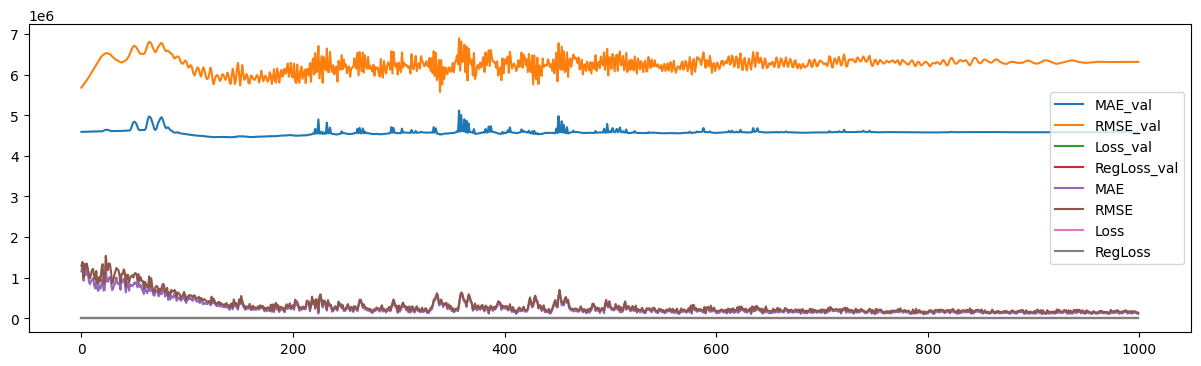

In [49]:
metrics.drop(['epoch'], axis=1).plot(figsize=(15,4));

In [50]:
future = m.make_future_dataframe(europe, periods=5, n_historic_predictions=len(europe))
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS


Predicting: 2it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [51]:
forecast.head()

,ds,y,yhat1,trend,season_yearly
0,2000-01-01,3204822,3271884.250,1.135328e+06,2136556.000
1,2001-01-01,2879112,2821002.750,1.151202e+06,1669800.125
2,2002-01-01,2861885,2749164.750,9.229861e+05,1826178.750
3,2003-01-01,2490645,2518568.375,5.367854e+05,1981782.875
4,2004-01-01,2163750,2260244.875,1.236890e+05,2136556.000


In [52]:
forecast['residual1']= forecast['y']-forecast['yhat1']

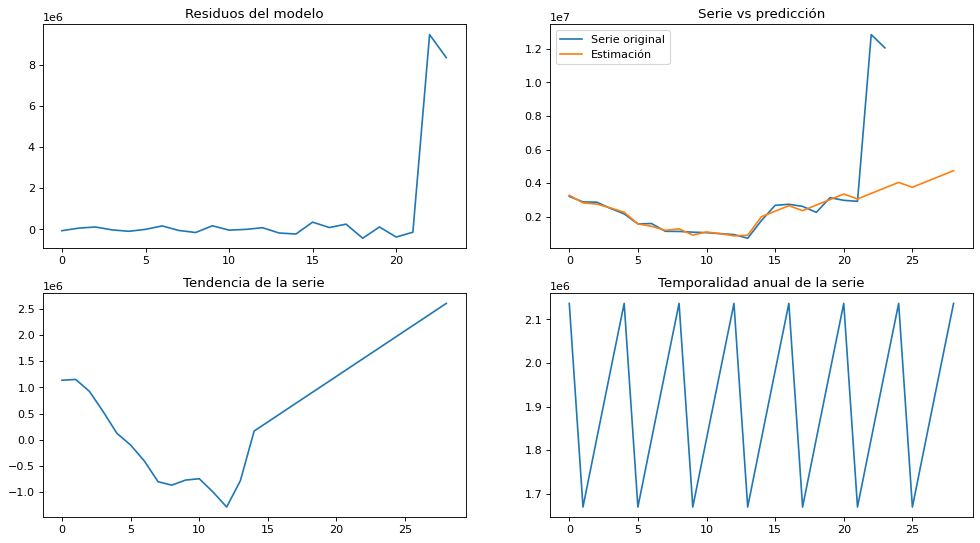

In [53]:
# Creamos gráfico
f = plt.figure(figsize=(15, 8), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(221)
ax1.set_title('Residuos del modelo')
ax1.plot(forecast['residual1'])
# Preparamos segundo componente
ax2 = f.add_subplot(222)
ax2.set_title('Serie vs predicción')
ax2.plot(forecast['y'])
ax2.plot(forecast['yhat1'])
ax2.legend(['Serie original', 'Estimación'])
# Preparamos tercer componente
ax3 = f.add_subplot(223)
ax3.set_title('Tendencia de la serie')
ax3.plot(forecast['trend'])
# Preparamos cuarto componente
ax4 = f.add_subplot(224)
ax4.set_title('Temporalidad anual de la serie')
ax4.plot(forecast['season_yearly'])